In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the Excel file
AIQ = pd.read_excel("C:\\Users\\ROSHAN COMPUTERS\\Desktop\\Hyd.xlsx")

# Displaying the first few rows of the dataframe
AIQ.head()

,Unnamed: 0,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,Raw Conc.,Conc. Unit,Duration,QC Name,AQI,AQI Category
0,0,Hyderabad,PM2.5 - Principal,2019-12-01 01:00:00,2019,12,1,1,59.3,57,UG/M3,1 Hr,Valid,153,Unhealthy
1,1,Hyderabad,PM2.5 - Principal,2019-12-01 02:00:00,2019,12,1,2,70.1,81,UG/M3,1 Hr,Valid,159,Unhealthy
2,2,Hyderabad,PM2.5 - Principal,2019-12-01 03:00:00,2019,12,1,3,68.5,67,UG/M3,1 Hr,Valid,158,Unhealthy
3,3,Hyderabad,PM2.5 - Principal,2019-12-01 04:00:00,2019,12,1,4,62.0,53,UG/M3,1 Hr,Valid,154,Unhealthy
4,4,Hyderabad,PM2.5 - Principal,2019-12-01 05:00:00,2019,12,1,5,58.1,52,UG/M3,1 Hr,Valid,152,Unhealthy


In [3]:
# Displaying unique values in the 'Month' column
AIQ["Month"].unique()

array([12,  1,  2,  3], dtype=int64)

<AxesSubplot:>

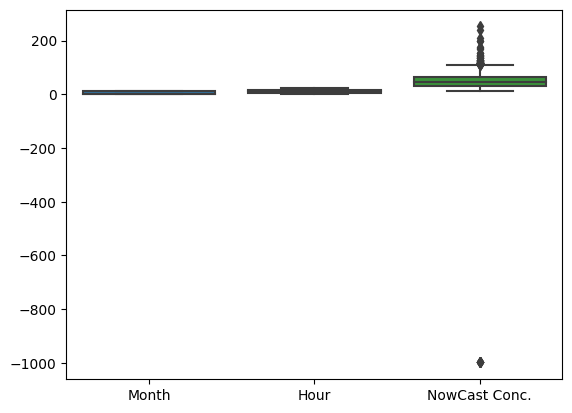

In [4]:
sns.boxplot(AIQ[["Month","Hour","NowCast Conc."]])

In [5]:

# Displaying column names
AIQ.columns


Index(['Unnamed: 0', 'Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day',
       'Hour', 'NowCast Conc.', 'Raw Conc.', 'Conc. Unit', 'Duration',
       'QC Name', 'AQI', 'AQI Category'],
      dtype='object')

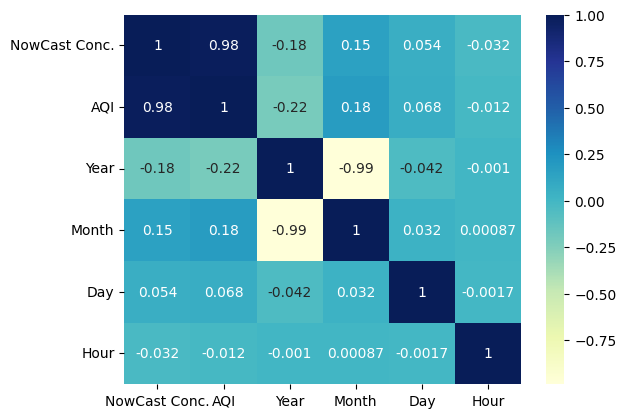

In [6]:
# Correlation heatmap
corr_columns = ['NowCast Conc.', 'AQI', 'Year', 'Month', 'Day', 'Hour']
sns.heatmap(AIQ[corr_columns].corr(), annot=True,cmap="YlGnBu")
plt.savefig("Correlation", dpi=300)


In [7]:
# Profiling the data
from ydata_profiling import ProfileReport
Profile = ProfileReport(AIQ, title="Air Quality Index report", explorative=True)
#Profile.to_file("Air Quality Index report.html")


In [32]:
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Data cleaning and outlier detection (NowCast Conc.)

Q1 = AIQ['NowCast Conc.'].quantile(0.25)
Q3 = AIQ['NowCast Conc.'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [9]:
outliers = (AIQ["NowCast Conc."] < lower_bound) | (AIQ["NowCast Conc."] > upper_bound)

In [10]:
AIQ.loc[outliers, "NowCast Conc."] = np.mean(AIQ["NowCast Conc."])

In [11]:

# Data cleaning and outlier detection (AQI)

Q1 = AIQ['AQI'].quantile(0.25)
Q3 = AIQ['AQI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [12]:
outliers1 = (AIQ["AQI"] < lower_bound) | (AIQ["AQI"] > upper_bound)

In [13]:
AIQ.loc[outliers1, "AQI"] = np.mean(AIQ["AQI"])

<AxesSubplot:xlabel='NowCast Conc.'>

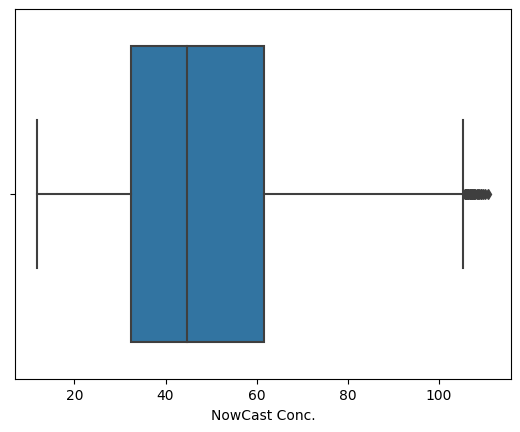

In [14]:
# Boxplot visualization (NowCast Conc.)

sns.boxplot(data=AIQ, x='NowCast Conc.')

In [15]:
# Extracting relevant columns for further analysis
a = AIQ[['NowCast Conc.', 'AQI']]

# Descriptive statistics
a.describe()


,NowCast Conc.,AQI
count,2853.000000,2853.000000
mean,49.020851,123.929322
std,21.314493,33.888271
min,11.900000,50.000000
25%,32.400000,94.000000
50%,44.800000,124.000000
75%,61.700000,155.000000
max,110.800000,247.000000


<AxesSubplot:xlabel='NowCast Conc.', ylabel='AQI'>

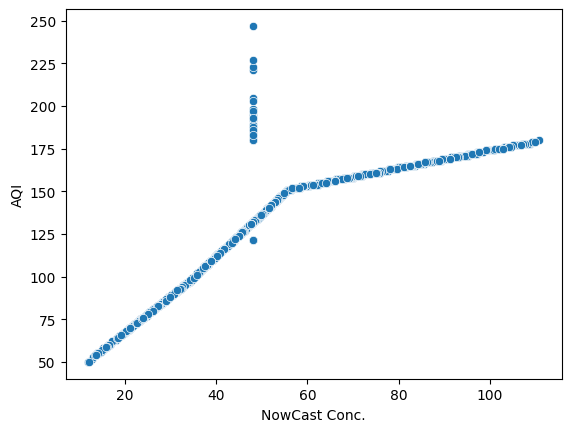

In [16]:
# Scatterplot
sns.scatterplot(x='NowCast Conc.', y='AQI', data=a)

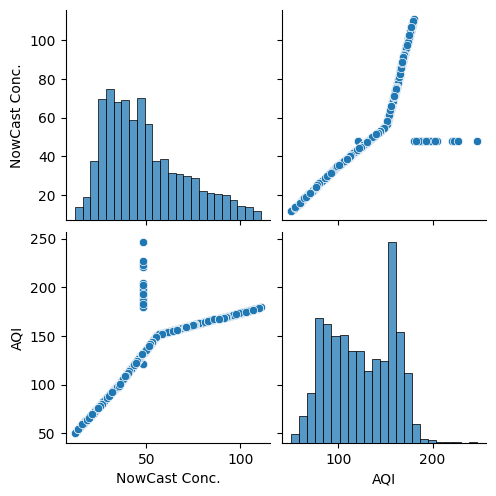

In [17]:
# Pairplot
sns.pairplot(a)

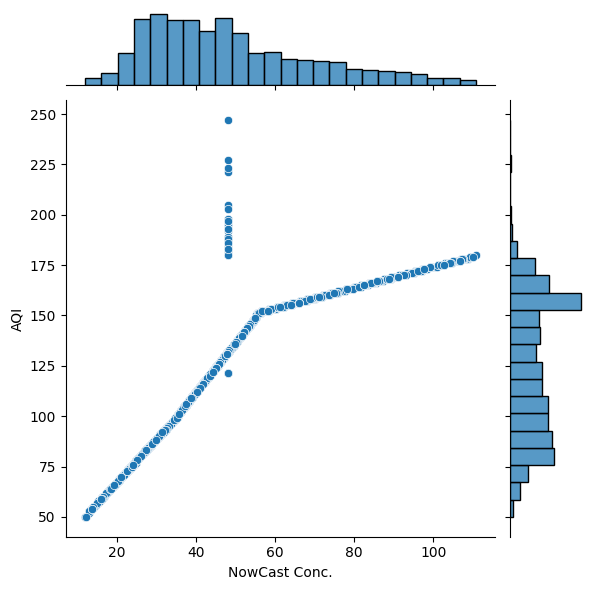

In [18]:
sns.jointplot(x='NowCast Conc.', y='AQI', data=a)

In [19]:
# Profiling the cleaned and processed data
Profile1 = ProfileReport(a, title="Air Quality Index report after cleaning", explorative=True)
#Profile1


# Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [21]:
X = a[["NowCast Conc."]]
Y = a[["AQI"]]

In [22]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [23]:
# Training the linear regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [24]:
# Making predictions on the test set
Y_train_pred=lr.predict(X_train)
Y_test_pred = lr.predict(X_test)


In [25]:

# Evaluating the model

r2_train=r2_score(Y_train,Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)
print(f"R-squared on the train set: {r2_train}")
print(f"R-squared on the test set: {r2_test}")


R-squared on the train set: 0.8320181085388942
R-squared on the test set: 0.8302298731774278


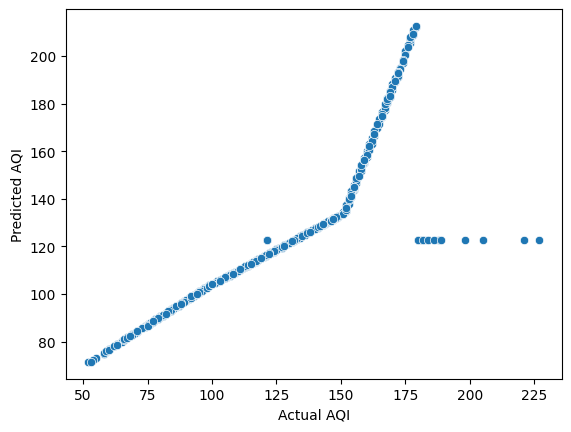

In [26]:
# Scatterplot of predictions vs. actual values
sns.scatterplot(x=Y_test.values.flatten(), y=Y_test_pred.flatten())
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.show()


In [27]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae=mean_absolute_error(Y_test , Y_test_pred)
mse=mean_squared_error(Y_test,Y_test_pred)
rmse=np.sqrt(mse)

print(f" Mean Absolute Error :{mae}")

print(f" Mean Squared Error :{mae}")

print(f" Root Mean Squared Error :{mae}")


 Mean Absolute Error :10.034468029125716
 Mean Squared Error :10.034468029125716
 Root Mean Squared Error :10.034468029125716


In [28]:
lr.predict([[62]])

D:\Python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[142.95358847]])

In [29]:
x=Y_test.values.flatten()

y=Y_test_pred.flatten()

<AxesSubplot:>

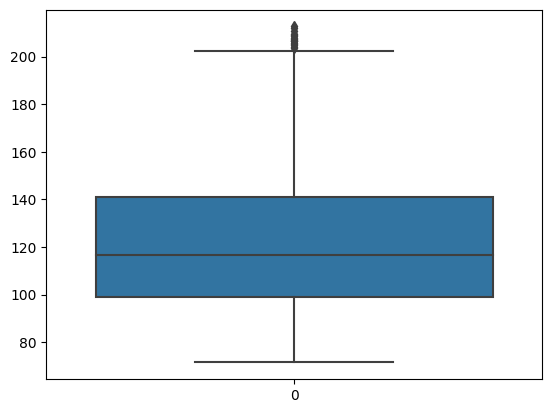

In [30]:
sns.boxplot(y)

<AxesSubplot:ylabel='Count'>

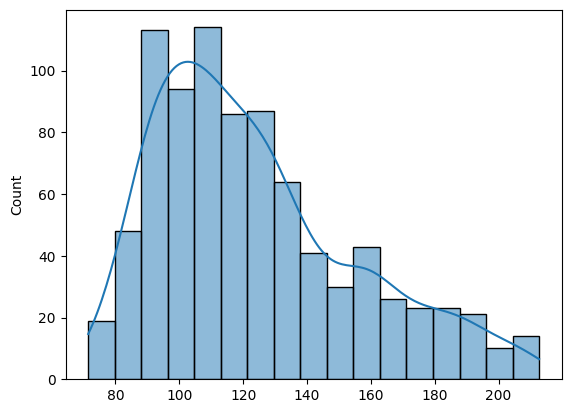

In [31]:
sns.histplot(y,kde=True)